## **(a) Data Processing (4 points)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [2]:
# 1. Download and read the data
train_data = pd.read_csv("data_train.csv")
test_data = pd.read_csv("data_test.csv")

In [3]:
# 2. Print the first 5 rows and shape of the training dataframe
print("First 5 rows of training data:")
print(train_data.head())
print("\nShape of training dataframe:", train_data.shape)

First 5 rows of training data:
   Unnamed: 0  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0           0        797.0    -200.0       2.1          593.0    146.0   
1           1       1282.0    -200.0      11.0         1013.0    354.0   
2           2        891.0    -200.0       7.6          882.0    342.0   
3           3       1285.0    -200.0      18.1         1243.0    481.0   
4           4        892.0    -200.0       7.3          869.0     71.0   

   PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  
0        1212.0     72.0         984.0        494.0  10.8  49.7  0.6429  
1         545.0    141.0        1384.0       1287.0  17.4  50.6  0.9989  
2         885.0    149.0         950.0        894.0   7.8  33.9  0.3594  
3         599.0    173.0        1815.0       1582.0  26.4  41.9  1.4237  
4         953.0     77.0        1363.0        632.0  37.4  14.7  0.9295  

Shape of training dataframe: (6250, 13)


In [4]:
# Describe data 
print(train_data.describe(),"\n")
train_data.info()

        Unnamed: 0  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  6250.000000  6173.000000  6173.000000  6173.000000    6173.000000   
mean   3124.500000  1053.137534  -159.131865     2.105864     900.956747   
std    1804.363923   330.409118   141.196552    41.223190     343.097628   
min       0.000000  -200.000000  -200.000000  -200.000000    -200.000000   
25%    1562.250000   924.000000  -200.000000     4.100000     715.000000   
50%    3124.500000  1055.000000  -200.000000     8.100000     903.000000   
75%    4686.750000  1226.000000  -200.000000    14.000000    1117.000000   
max    6249.000000  2008.000000  1129.000000    63.700000    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  6173.000000   6173.000000  6173.000000   6173.000000  6173.000000   
mean    172.548032    789.718775    59.277175   1400.209785   983.046331   
std     259.096948    320.048320   126.634023    466.410914   459.039659   
min    -200

***
### **Description of the data**
<font size="4">The data has 6250 rows and 13 columns. The unnamed column (looks like a serial number column) is of type int and has 6250 non-null entries, while the other 12 columns are of type float and have 6173 non-null entries.</font>


In [5]:
# 3. Check for missing values
missing_values_train = train_data.isnull().sum()
missing_values_test = test_data.isnull().sum()

print("Missing values in training data:")
print(missing_values_train)

print("\nMissing values in test data:")
print(missing_values_test)


Missing values in training data:
Unnamed: 0        0
PT08.S1(CO)      77
NMHC(GT)         77
C6H6(GT)         77
PT08.S2(NMHC)    77
NOx(GT)          77
PT08.S3(NOx)     77
NO2(GT)          77
PT08.S4(NO2)     77
PT08.S5(O3)      77
T                77
RH               77
AH               77
dtype: int64

Missing values in test data:
Unnamed: 0        0
NMHC(GT)         37
C6H6(GT)         37
PT08.S2(NMHC)    37
NOx(GT)          37
PT08.S3(NOx)     37
NO2(GT)          37
PT08.S4(NO2)     37
PT08.S5(O3)      37
T                37
RH               37
AH               37
dtype: int64


***
<font size="4">The data has missing values - Training data has 77 missing values in each column other than unnamed column and similarly Testing data has 37 missing values in each column other than unnamed column</font>


In [6]:
# 4. Drop rows with missing data
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

In [7]:
# 5. Extract features and label
X_train = train_data.drop(columns=['PT08.S1(CO)', 'Unnamed: 0'])
y_train = train_data['PT08.S1(CO)']
X_test = test_data.drop(columns=['Unnamed: 0'])  # Test data only contains features


## **(b) Exploratory Data Analysis (10 points)**

<Figure size 1200x1000 with 0 Axes>

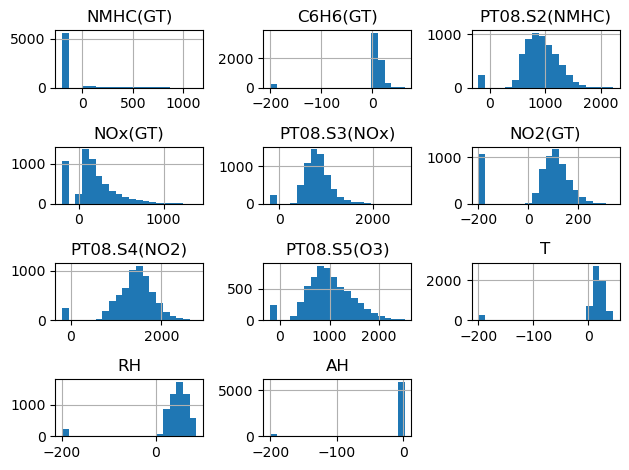

In [8]:
# 1. Plot histograms of all features
plt.figure(figsize=(12, 10))
X_train.hist(bins=20)
plt.tight_layout()
plt.show()

***
<font size="4"> From the histograms, it appears that the features do not have a normal distribution, and are skewed to one side. There are outlier values in the data too, but didn't remove them. Instead, using z-score normalization which doesn't use the min and max values of the features and hence, is less affected by outliers.</font>

<font size = '4'>The features have different scales, so we need to do normalization to ensure that no single feature dominates the learning algorithm due to its larger magnitude. Normalization can also help improve the convergence. Implementing z-score normalization, for scaling the data to have zero mean and unit variance.</font>

In [9]:
def normalize(X):
        # Normalize X to have zero mean and unit variance
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0)
        return (X - mean) / std

X_train_norm = normalize(X_train)
X_test_norm = normalize(X_test)

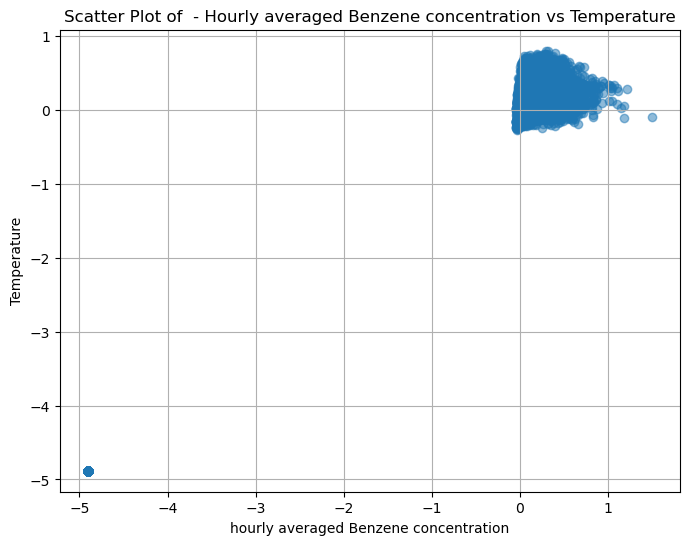

In [10]:
# 2. Scatter plot for two features
plt.figure(figsize=(8, 6))
plt.scatter(X_train_norm['C6H6(GT)'], X_train_norm['T'], alpha=0.5)
plt.title('Scatter Plot of  - Hourly averaged Benzene concentration vs Temperature')
plt.xlabel('hourly averaged Benzene concentration')
plt.ylabel('Temperature')
plt.grid(True)
plt.show()

***
<font size = "4"> As all the points are densely clustered in the plot, it suggests a high positive correlation between the two features - C6H6(GT) and Temperature. This means that as the value of one increases, the value of the other also tends to increase, and vice versa.</font>

In [11]:
# 3. Compute Pearson's correlation Matrix

# Select columns 1-12 for correlation calculation
train_norm = normalize(train_data) # Using the normalized values of train_data as it has the target variable, while X_train doesn't
selected_features = train_norm.iloc[:, 1:13]

# Initialize correlation matrix C
C = np.zeros((12, 12))

# Compute Pearson correlation coefficient for each pair of variables
for i in range(12):
    for j in range(12):
        # Calculate means
        mean_i = np.mean(selected_features.iloc[:, i])
        mean_j = np.mean(selected_features.iloc[:, j])
        
        # Calculate differences from means
        diff_i = selected_features.iloc[:, i] - mean_i
        diff_j = selected_features.iloc[:, j] - mean_j
        
        # Compute sum of products
        sum_products = np.sum(diff_i * diff_j)
        
        # Calculate standard deviations
        std_dev_i = np.std(selected_features.iloc[:, i])
        std_dev_j = np.std(selected_features.iloc[:, j])
        
        # Compute Pearson correlation coefficient
        correlation = sum_products / (len(selected_features) * std_dev_i * std_dev_j)
        
        # Assign correlation coefficient to matrix C
        C[i, j] = correlation

# Print the correlation matrix
#print("Pearson's Correlation Matrix:")
#print(C)

***
<font size = "4" >The heatmap below visualizes the Pearson's correlation coefficients between pairs of variables.
Variables with high positive correlation have values closer to 1, while high negative correlation has values closer to -1 and 0 indicates no relationship </font>


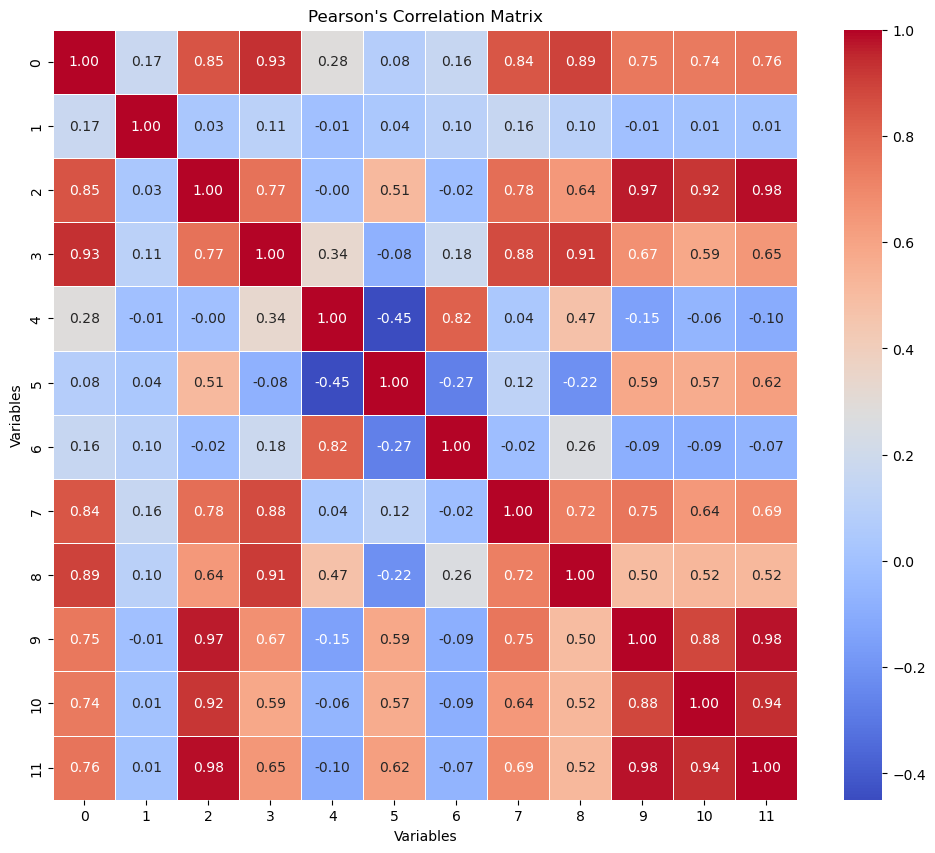

{0: 'PT08.S1(CO)', 1: 'NMHC(GT)', 2: 'C6H6(GT)', 3: 'PT08.S2(NMHC)', 4: 'NOx(GT)', 5: 'PT08.S3(NOx)', 6: 'NO2(GT)', 7: 'PT08.S4(NO2)', 8: 'PT08.S5(O3)', 9: 'T', 10: 'RH', 11: 'AH'}


In [12]:
# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(C, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Pearson's Correlation Matrix")
plt.xlabel("Variables")
plt.ylabel("Variables")
plt.show()
print({selected_features.columns.get_loc(c):c  for c in selected_features.columns})
#print("0: PT08.S1(CO), 1: NMHC(GT),  2: C6H6(GT), 3: PT08.S2(NMHC), 4: NOx(GT), 5: PT08.S3(NOx), 6: NO2(GT), 7: PT08.S4(NO2), 8: PT08.S5(O3), 9: T, 10: RH, 11: AH ")

## **(c) (20 points) Linear Regression Implementation**

In [13]:
class LinearRegression:
    def __init__(self, learning_rate, num_iterations):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for _ in range(self.num_iterations):
            # Calculate predictions
            y_pred = np.dot(X, self.weights) + self.bias

            # Calculate gradients
            d_weights = - (2 / num_samples) * np.dot(X.T, (y - y_pred))
            d_bias = - (2 / num_samples) * np.sum(y - y_pred)

            # Update parameters
            self.weights -= self.learning_rate * d_weights
            self.bias -= self.learning_rate * d_bias

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


In [14]:
LinReg = LinearRegression(learning_rate=0.05, num_iterations=1000)

# Fit the model
LinReg.fit(X_train_norm.values, y_train.values)

In [15]:
# Make predictions
y_pred = LinReg.predict(X_train_norm.values)
#print(y_pred)

## **(d) (20 points) Logistic Regression Implementation**

In [16]:
class LogisticRegression() : 
    
    def __init__( self, learning_rate, iterations) :         
        self.learning_rate = learning_rate         
        self.iterations = iterations 

    def create_binary_labels(self, y, threshold):
        return (y > threshold).astype(int)
 
    def fit( self, X, Y ) :         
        # no_of_training_examples, no_of_features         
        self.n, self.f = X.shape         
        # weight initialization         
        self.W = np.zeros( self.f )         
        self.b = 0        
        self.X = X         
        self.Y = Y 
          
        # gradient descent learning  
        for i in range( self.iterations ) :             
            self.update_weights(X)             
        return self
      
    def update_weights( self, X ) : 
        # Compute the logistic function
        #A = expit(-(self.X.dot(self.W) + self.b))
        #A = 1 / ( 1 + np.exp( - ( self.X.dot( self.W ) + self.b ) ) )
        Z = X.dot(self.W) + self.b
        A = 1 / (1 + np.exp(-Z))
        
        # calculate gradient         
        gradient = ( A - self.Y.T ) 
        gradient = np.clip(gradient, -1e3, 1e3)
        gradient = np.reshape( gradient, self.n )         
        dW = np.dot( self.X.T, gradient ) / self.n          
        db = np.sum( gradient ) / self.n  
          
        # update weights     
        self.W = self.W - self.learning_rate * dW     
        self.b = self.b - self.learning_rate * db 
          
        return self

    def predict( self, X ) :     
        #Z = 1 / ( 1 + np.exp( - ( X.dot( self.W ) + self.b ) ) )   
        Z = X.dot(self.W) + self.b
        A = 1 / (1 + np.exp(-Z))
        Y = np.where( A > 0.5, 1, 0 )         
        return Y 

    def predict_proba(self, X):
        Z = X.dot(self.W) + self.b
        A = 1 / (1 + np.exp(-Z))
        return A

In [17]:
LogReg= LogisticRegression(learning_rate=0.5, iterations=1000)
y_train_binary = LogReg.create_binary_labels(y_train, 1000)
# Fit the model
LogReg.fit(X_train_norm.values, y_train_binary.values)

In [18]:
# Make predictions
y_pred_binary = LogReg.predict(X_train_norm.values)

In [19]:
#print(y_pred_binary)
#accuracy = np.mean(y_pred_binary == y_train_binary)
#print(accuracy)

## **(e) (10 points) Result Analysis - Linear Regression**

In [20]:
# Define the number of folds
num_folds = 5
kf = KFold(n_splits=num_folds)

# Initialize lists to store RMSE values for each fold
rmse_values = []

# Perform 5-fold cross-validation
for train_index, val_index in kf.split(X_train_norm):
    X_train_fold, X_val_fold = X_train_norm.iloc[train_index], X_train_norm.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Train the model on the training fold
    LinReg.fit(X_train_fold, y_train_fold)

    # Make predictions on the validation fold
    y_pred_val = LinReg.predict(X_val_fold)

     # Check for NaN values in predictions
    if np.isnan(y_pred_val).any():
        print("NaN values detected in predictions for fold.")
        continue

    # Compute RMSE for the validation fold
    rmse_fold = np.sqrt(mean_squared_error(y_val_fold, y_pred_val))
    rmse_values.append(rmse_fold)

# Average and standard deviation of RMSE values
average_rmse = np.mean(rmse_values)
std_dev_rmse = np.std(rmse_values)

print("rmse for each fold:", rmse_values)
print("Average RMSE across 5 folds:", average_rmse)
print("Standard deviation of RMSE across 5 folds:", std_dev_rmse)

rmse for each fold: [70.6711894764314, 72.71372129644202, 68.31768725742866, 72.79115509102813, 73.57509408508243]
Average RMSE across 5 folds: 71.61376944128253
Standard deviation of RMSE across 5 folds: 1.9076446295434655


<font size = "4" >Based on the RMSE values and their standard deviation, there doesn't seem to be a significant change across different folds. The average RMSE across the five folds is approximately 71.61 and the standard deviation is around 1.91. Therefore it seems like the model's performance is relatively consistent across different subsets of the data. </font>

***
<font size = "4" > We can use the coefficients of the model to identify the most informative features by examining their magnitudes. Features with larger coefficients contribute more to the prediction and are considered more informative. We can rank the features based on their coefficients to identify the most influential ones in predicting the target variable. </font>

In [21]:
coefficients = LinReg.weights

# Identifying the most informative features based on coefficients
most_informative_features = X_train.columns[np.abs(coefficients).argsort()[::-1]]

print("Most informative features (ranked by coefficients):")
print(most_informative_features)

Most informative features (ranked by coefficients):
Index(['PT08.S5(O3)', 'PT08.S2(NMHC)', 'C6H6(GT)', 'RH', 'AH', 'PT08.S3(NOx)',
       'NMHC(GT)', 'PT08.S4(NO2)', 'NOx(GT)', 'T', 'NO2(GT)'],
      dtype='object')


## **(f) (10 points) Result Analysis - Logistic Regression**

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def cross_validation(folds):
    num_folds = folds
    kf = KFold(n_splits=num_folds)
    accuracy_values = []
    precision_values = []
    recall_values = []
    f1_values = []
    #y_train_binary =(y_train > 1000).astype(int)

    for train_index, val_index in kf.split(X_train_norm):
        X_train_fold, X_val_fold = X_train_norm.iloc[train_index], X_train_norm.iloc[val_index]
        y_train_fold, y_val_fold = y_train_binary.iloc[train_index], y_train_binary.iloc[val_index]

        # Train the model on the training fold
        LogReg.fit(X_train_fold, y_train_fold)

        # Make predictions on the validation fold
        y_pred_val = LogReg.predict(X_val_fold)

        # Compute evaluation metrics
        accuracy = accuracy_score(y_val_fold, y_pred_val)
        precision = precision_score(y_val_fold, y_pred_val)
        recall = recall_score(y_val_fold, y_pred_val)
        f1 = f1_score(y_val_fold, y_pred_val)

        accuracy_values.append(accuracy)
        precision_values.append(precision)
        recall_values.append(recall)
        f1_values.append(f1)

    return accuracy_values, precision_values, recall_values, f1_values
    

In [23]:
accuracy_values, precision_values, recall_values, f1_values = cross_validation(folds = 5)

average_accuracy = np.mean(accuracy_values)
std_dev_accuracy = np.std(accuracy_values)
average_precision = np.mean(precision_values)
std_dev_precision = np.std(precision_values)
average_recall = np.mean(recall_values)
std_dev_recall = np.std(recall_values)
average_f1 = np.mean(f1_values)
std_dev_f1 = np.std(f1_values)

# Evaluation metrics at each fold
print("Accuracy at each fold:", accuracy_values)
print("Precision at each fold:", precision_values)
print("Recall at each fold:", recall_values)
print("f1 score at each fold:", f1_values)

# Report average and standard deviation of evaluation metrics
print("Average Accuracy across 5 folds:", average_accuracy)
print("Standard deviation of Accuracy across 5 folds:", std_dev_accuracy)
print("Average Precision across 5 folds:", average_precision)
print("Standard deviation of Precision across 5 folds:", std_dev_precision)
print("Average Recall across 5 folds:", average_recall)
print("Standard deviation of Recall across 5 folds:", std_dev_recall)
print("Average F1 Score across 5 folds:", average_f1)
print("Standard deviation of F1 Score across 5 folds:", std_dev_f1)

Accuracy at each fold: [0.9133603238866397, 0.9109311740890689, 0.9076923076923077, 0.893030794165316, 0.9035656401944895]
Precision at each fold: [0.9173441734417345, 0.9326145552560647, 0.922972972972973, 0.9146666666666666, 0.91343669250646]
Recall at each fold: [0.9363762102351314, 0.9202127659574468, 0.922972972972973, 0.9098143236074271, 0.9314888010540184]
f1 score at each fold: [0.9267624914442163, 0.9263721552878179, 0.922972972972973, 0.9122340425531914, 0.9223744292237444]
Average Accuracy across 5 folds: 0.9057160480055645
Standard deviation of Accuracy across 5 folds: 0.007142520772216936
Average Precision across 5 folds: 0.9202070121687796
Standard deviation of Precision across 5 folds: 0.007018919672186251
Average Recall across 5 folds: 0.9241730147653993
Standard deviation of Recall across 5 folds: 0.009227506612164803
Average F1 Score across 5 folds: 0.9221432182963886
Standard deviation of F1 Score across 5 folds: 0.005256525615224019


***
<font size = "4" > There doesn't seem to be a significant change across the different folds. The average values of accuracy, precision, recall, F1 score and standard deviations are relatively consistent across the five folds. Thus, the model's performance seems stable across different subsets of the data.</font>

## **(g) (10 points) ROC Curve - Logistic Regression**

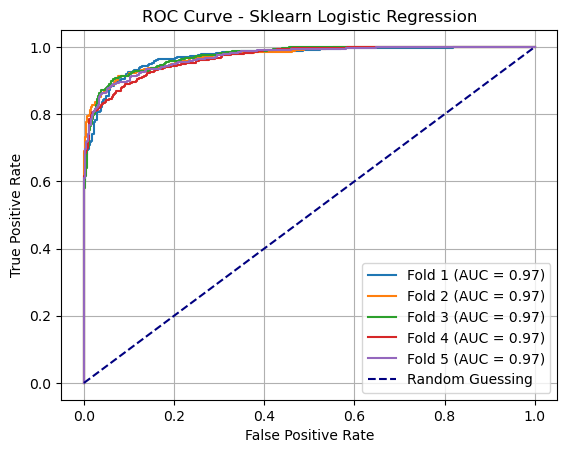

Mean AUC across 5 folds: 0.97


In [24]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression as lr

# Initialize logistic regression model
log_reg = lr()

# Define the number of folds for k-fold cross-validation
num_folds = 5
kf = KFold(n_splits=num_folds)

# Initialize lists to store fpr, tpr, and auc values for each fold
fpr_list1 = []
tpr_list1 = []
auc_list1 = []


# Perform k-fold cross-validation on sklearn model
for train_index, val_index in kf.split(X_train_norm):
    X_train_fold, X_val_fold = X_train_norm.iloc[train_index], X_train_norm.iloc[val_index]
    y_train_fold, y_val_fold = y_train_binary.iloc[train_index], y_train_binary.iloc[val_index]

    # Train the model on the training fold for both sklearn model 
    log_reg.fit(X_train_fold, y_train_fold)

    # Make predictions on the validation fold
    y_pred_val_proba1 = log_reg.predict_proba(X_val_fold)[:, 1]

    # Compute false positive rate, true positive rate, and thresholds
    fpr1, tpr1, thresholds1 = roc_curve(y_val_fold, y_pred_val_proba1)

    # Compute area under the curve (AUC)
    roc_auc1 = auc(fpr1, tpr1)

    # Append fpr, tpr, and auc values to lists
    fpr_list1.append(fpr1)
    tpr_list1.append(tpr1)
    auc_list1.append(roc_auc1)

    # Plot ROC curve for the current fold
    plt.plot(fpr1, tpr1, label=f'Fold {len(auc_list1)} (AUC = {roc_auc1:.2f})')
    

# Plot ROC curve for random guessing (diagonal line)
plt.plot([0, 1], [0, 1], linestyle='--', color='navy', label='Random Guessing')

# Set plot labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Sklearn Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Print mean AUC across all folds
mean_auc1 = np.mean(auc_list1)
print(f'Mean AUC across {num_folds} folds: {mean_auc1:.2f}')


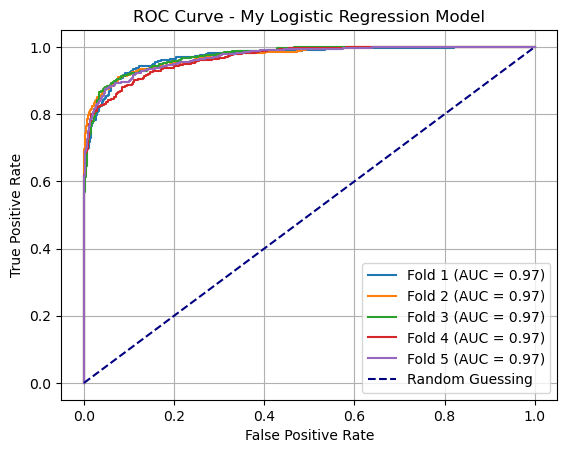

Mean AUC across 5 folds: 0.97


In [25]:
fpr_list2 = []
tpr_list2 = []
auc_list2 = []


# Perform k-fold cross-validation on my model
for train_index, val_index in kf.split(X_train_norm):
    X_train_fold, X_val_fold = X_train_norm.iloc[train_index], X_train_norm.iloc[val_index]
    y_train_fold, y_val_fold = y_train_binary.iloc[train_index], y_train_binary.iloc[val_index]

    # Train the model on the training fold for my model
    LogReg.fit(X_train_fold, y_train_fold)

    # Make predictions on the validation fold
    y_pred_val_proba2 = LogReg.predict_proba(X_val_fold)

    # Compute false positive rate, true positive rate and thresholds
    fpr2, tpr2, thresholds2 = roc_curve(y_val_fold, y_pred_val_proba2)

    # Compute area under the curve (AUC)
    roc_auc2 = auc(fpr2, tpr2)

    # Append fpr, tpr and auc values to lists
    fpr_list2.append(fpr2)
    tpr_list2.append(tpr2)
    auc_list2.append(roc_auc2)

    # Plot ROC curve for the current fold
    plt.plot(fpr2, tpr2, label=f'Fold {len(auc_list2)} (AUC = {roc_auc2:.2f})')

# Plot ROC curve for random guessing (diagonal line)
plt.plot([0, 1], [0, 1], linestyle='--', color='navy', label='Random Guessing')

# Set plot labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - My Logistic Regression Model')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Print mean AUC across all folds
mean_auc2 = np.mean(auc_list2)
print(f'Mean AUC across {num_folds} folds: {mean_auc2:.2f}')

***
<font size = "4" > The result obtained using sklearn model is consistent with the results obtained using the logistic regression model I implemented. </font>

## **(h) Inference - Linear and Logistic Regression**

In [26]:
# 1. Make predictions with Linear Regression Model
y_pred = LinReg.predict(X_test_norm.values)

In [27]:
# 2. Make predictions with Logistic Regression Model
y_pred_binary = LogReg.predict(X_test_norm.values)

In [28]:
# 3. Save the predictions in a csv file

# Create a DataFrame with both the predictions
predictions_df = pd.DataFrame({'pred_linear': y_pred, 'pred_logistic': y_pred_binary})

# Saving the DataFrame to a CSV file
predictions_df.to_csv("predictions.csv", index=False)